## 3. 予測

#### 「1.データ抽出」で出力された data0.csvから、予測したいデータだけを残してdata2.csvを作り、そのデータを使って予測する。

In [1]:
import pandas as pd

df = pd.read_csv("data2.csv", encoding='shift-jis')
df

,Unnamed: 0,date_FCR_F,new_coil,pp_FCR_F,FCR_F_1,FCR_F_2,FCR_F_3,FCR_F_4,FCR_F_5,FCR_F_6,...,炉温7,炉温8,炉温9,炉温10,炉温11,炉温12,炉温13,炉温14,炉温15,炉温16
0,131,2024/10/4 0:00,53582-21,9F,21.920825,6.580988,2.200900,1.170974,0.385492,0.968103,...,649,656,513,403,297,301,210,197,89,23
1,132,2024/10/4 0:00,53583-21,9F,18.855709,4.460123,0.895893,0.840825,0.000000,0.132423,...,647,656,511,403,296,301,217,205,92,26
2,133,2024/10/4 0:00,53584-21,9F,22.244060,7.802688,1.768952,0.345117,0.000000,0.149195,...,648,656,513,403,301,301,213,198,88,26


In [2]:
import pickle

with open('RF03.pkl', 'rb') as f:
    model = pickle.load(f)
    

# 予測用コイルのコイル番号取得
coil_research = input("予測するコイル番号を入力：")

# 予測用データのインデックスを取得
index_reserch = df[df["new_coil"] == coil_research].index[0]

# 予測用データをDF化
#datalist = pd.concat([df.loc[index_reserch, "FCR_F_1":"FCR_F_20"], pd.Series(df.loc[index_reserch, "熱処理速度"], index=["熱処理速度"])])
datalist = pd.concat([df.loc[index_reserch, "FCR_F_1":"FCR_F_20"], df.loc[index_reserch, "熱処理速度":"炉温16"]])
df_p = pd.DataFrame([datalist])

# 予測結果
predicted = model.predict(df_p)
df_TA_B_predicted = pd.DataFrame(predicted)
df_TA_B_predicted = df_TA_B_predicted.rename(index={0: 'TA_B_predicted'})


予測するコイル番号を入力： 53584-21


In [3]:

# FCR_F：入力データ
Li_FCR_F = df.loc[index_reserch, "FCR_F_1":"FCR_F_20"]
df_FCR_F = pd.DataFrame([Li_FCR_F])
df_FCR_F = df_FCR_F.reset_index(drop=True).rename({0: "FCR_F"})
df_FCR_F.columns = [ i for i in range(0, 20)]

# TA_B：実際のデータ
Li_TA_B_actual = df.loc[index_reserch, "TA_B_1":"TA_B_20"]
df_TA_B_actual = pd.DataFrame([Li_TA_B_actual])
df_TA_B_actual = df_TA_B_actual.reset_index(drop=True).rename({0: "TA_B_actual"})
df_TA_B_actual.columns = [ i for i in range(0, 20)]

# データフレームを結合
df2 = pd.concat([df_FCR_F, df_TA_B_actual, df_TA_B_predicted])
df2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
FCR_F,22.244060,7.802688,1.768952,0.345117,0.000000,0.149195,0.013052,0.426052,0.408100,0.364902,0.193270,0.129357,0.656196,0.930169,2.730823,3.159302,5.826214,8.081324,11.196479,12.922164
TA_B_actual,15.057188,5.323653,1.778259,1.199108,0.856945,0.417762,0.487974,0.338472,0.113441,0.884060,0.866626,0.003263,0.000000,0.061834,0.404065,1.172520,2.822655,5.528644,9.651175,17.141148
TA_B_predicted,16.127397,4.357681,0.347021,0.313796,0.240484,0.578808,0.741631,1.637832,1.723937,2.174108,1.397243,0.697332,0.589448,0.315100,0.726211,1.125483,2.685778,4.578279,8.371021,13.933449


### グラフ描画

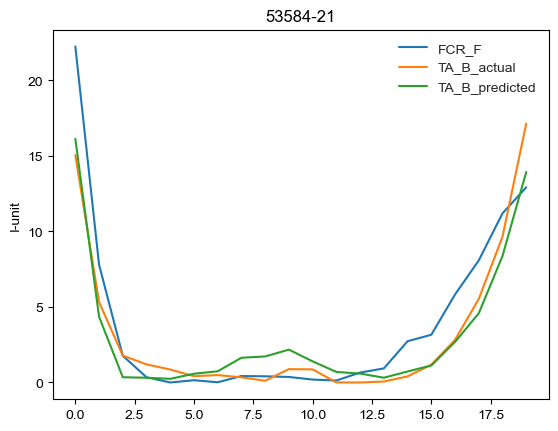

In [4]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig, ax = plt.subplots()

# グリッドのスタイルを指定
plt.style.use('seaborn-v0_8-whitegrid')

# グラフ描画
for i in range(len(df2.index)):
    
    x  = df2.columns
    y  = df2.iloc[i]

    ax.plot(x, y, label = df2.index[i])
    ax.set_ylabel("I-unit")
    ax.set_title(coil_research) 
    ax.legend(loc=0)

# グラフ保存・表示    
plt.savefig(f"{coil_research}.png")
plt.show()